In [122]:
import os
import pandas as pd
pd.set_option('display.max_columns', None)
from google.cloud import bigquery
import numpy as np

df_daily = pd.read_gbq("select * from `intense-arbor-186802`.sample_data.top_3_prods",
                 project_id="intense-arbor-186802")

In [123]:
df_daily["resource_type"] = np.where(df_daily["resource_type"].str.contains("VCPU"),"VCPU",
         np.where(df_daily["resource_type"].str.contains("Fee"), "Licensing Fees",
                  np.where(df_daily["resource_type"].str.contains("GPU"), "GPU",
                           np.where(df_daily["resource_type"].str.contains("CPU"), "CPU",
                                    np.where(df_daily["resource_type"].str.contains("Egress"), "Egress",
                                             np.where(df_daily["resource_type"].str.contains("PD"), "PD", 
                                                      np.where(df_daily["resource_type"].str.contains("Load Balancing"),"Load Balancing",
                                                              np.where(df_daily["resource_type"].str.contains("Custom instance"),"Custom Instance",
                                                                       np.where(df_daily["resource_type"].str.contains(" Regional Storage"),"Regional Storage",
                                                                               np.where(df_daily["resource_type"].str.contains("Multi-Regional Storage"),"Multi-Regional Storage",
                                                                                       np.where(df_daily["resource_type"].str.contains("Static Ip"), "Static Ip Charge",
                                                                                               df_daily["resource_type"]
                                                                                               )
                                                                                       )
                                                                               )
                                                                      )
                                                              )
                                                    )
                                               )
                                      )
                            )
                    )
                                    )
                                             
                      


In [124]:
df_daily = df_daily[(df_daily["resource_type"] != "Custom Instance")]
df_daily = df_daily[(df_daily["resource_type"] != "GPU")]
df_daily["resource_type"].unique()

array(['Analysis', 'Vpn Tunnel', 'Storage Image', 'Active Storage',
       'Static Ip Charge', 'Streaming Insert', 'Long Term Storage',
       'Regional Storage US', 'PD', 'Regional Storage Asia',
       'Multi-Regional Storage', 'Egress', 'Regional Storage', 'CPU',
       'VCPU', 'Licensing Fees', 'Load Balancing'], dtype=object)

In [120]:
def plot_prod(product, legend=True):
    df_daily_prod = df_daily[df_daily["product"] == product][["start_time","unit","cost","resource_type"]]

    for unit in df_daily_prod["unit"].unique():
        print(unit)
        df_daily_prod_unit = df_daily_prod[df_daily_prod["unit"] ==unit]
        df_daily_prod_unit_pivot = pd.pivot_table(df_daily_prod_unit, 
                                             values="cost", 
                                             index="start_time", 
                                             columns=["unit","resource_type"])

        for col in df_daily_prod_unit_pivot.columns:
            df_daily_prod_unit_pivot[col] = np.log(df_daily_prod_unit_pivot[col])

        df_daily_prod_unit_pivot.plot(title=product,figsize=(15,10),legend = legend)

bytes
byte-seconds
byte-seconds


C:\Users\jstep\Anaconda3\envs\MonotonicWOE\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\jstep\Anaconda3\envs\MonotonicWOE\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\jstep\Anaconda3\envs\MonotonicWOE\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


requests
seconds
byte-seconds


C:\Users\jstep\Anaconda3\envs\MonotonicWOE\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


bytes


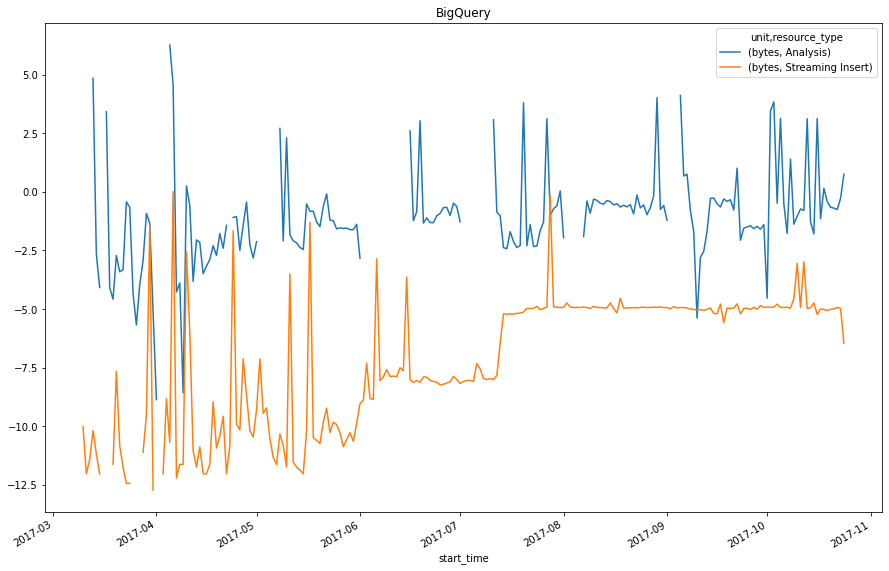

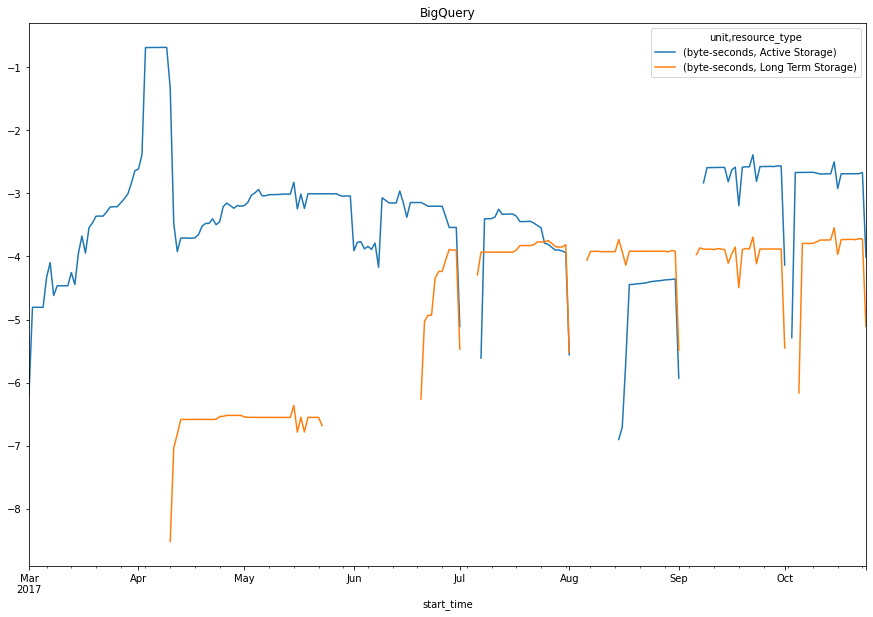

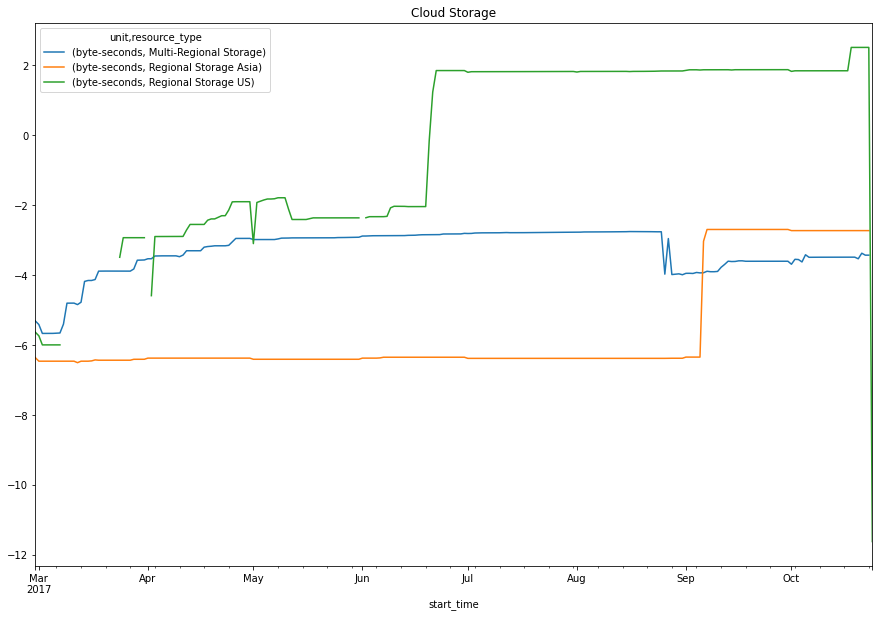

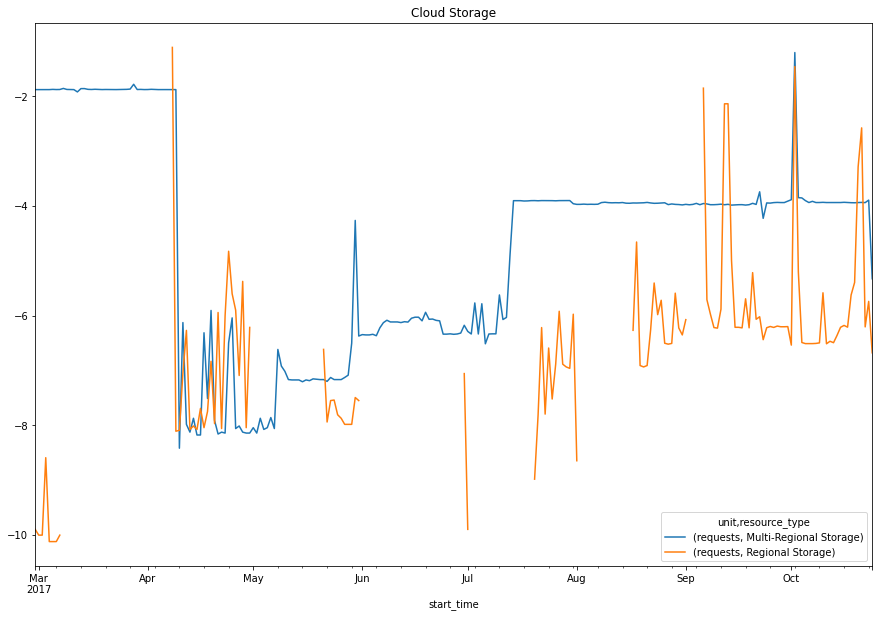

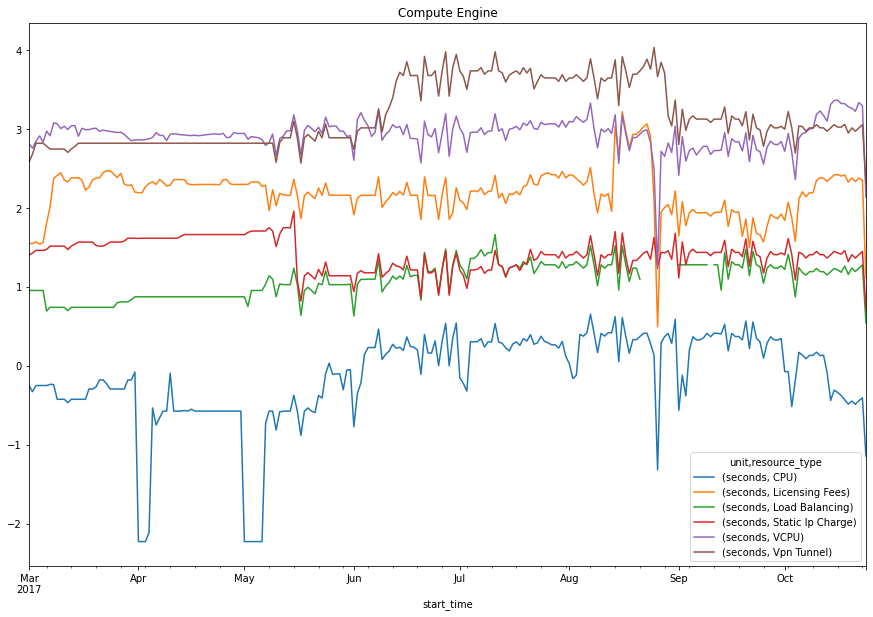

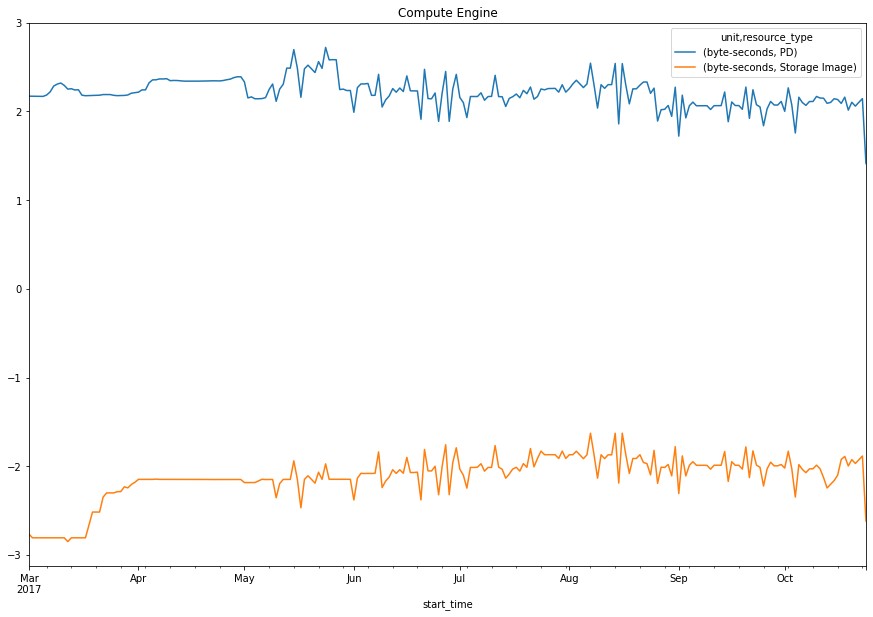

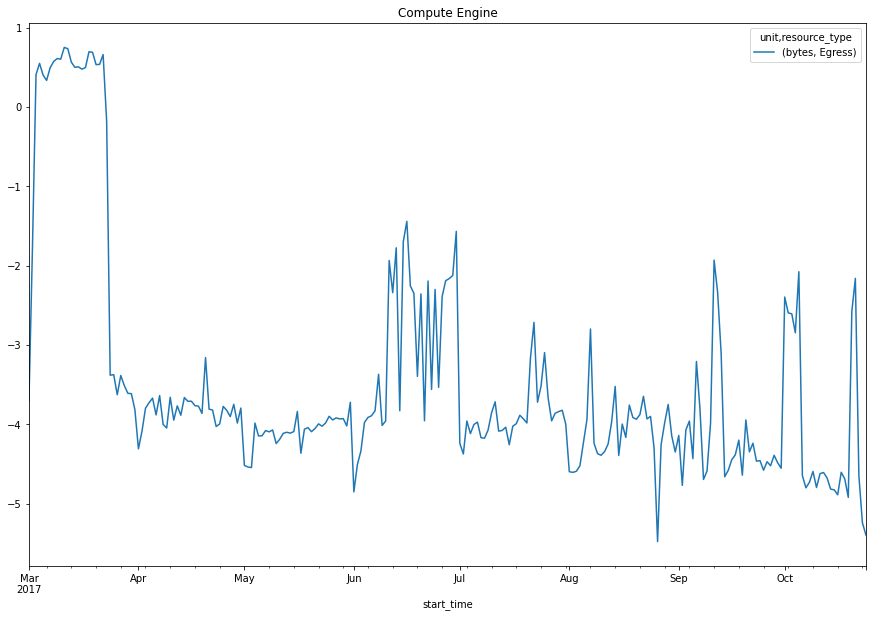

In [121]:
plot_prod("BigQuery")
plot_prod("Cloud Storage")
plot_prod("Compute Engine",legend=True)

In [132]:
df_daily_prod = df_daily[df_daily["product"] == "Compute Engine"]

In [133]:
df_daily_prod[["unit","resource_type"]].groupby(["unit","resource_type"]).size()

unit          resource_type   
byte-seconds  PD                  1765
              Storage Image        238
bytes         Egress              1598
seconds       CPU                  713
              Licensing Fees       852
              Load Balancing       874
              Static Ip Charge     400
              VCPU                3891
              Vpn Tunnel           238
dtype: int64

In [ ]:
! git add .
! git commit -m "adding graphs "